In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

In [17]:
data = np.array([
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [2, 1, 0, 0, 0],
    [2, 2, 1, 0, 0],
    [2, 2, 1, 1, 1],
    [1, 2, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 2, 1, 0, 0],
    [2, 1, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [2, 1, 0, 1, 1]
])

X = data[:, :-1]
y = data[:, -1]

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

전체 데이터 엔트로피: 0.9403


Feature 0의 정보 이득: 0.2467
Feature 1의 정보 이득: 0.0292
Feature 2의 정보 이득: 0.1518
Feature 3의 정보 이득: 0.0481


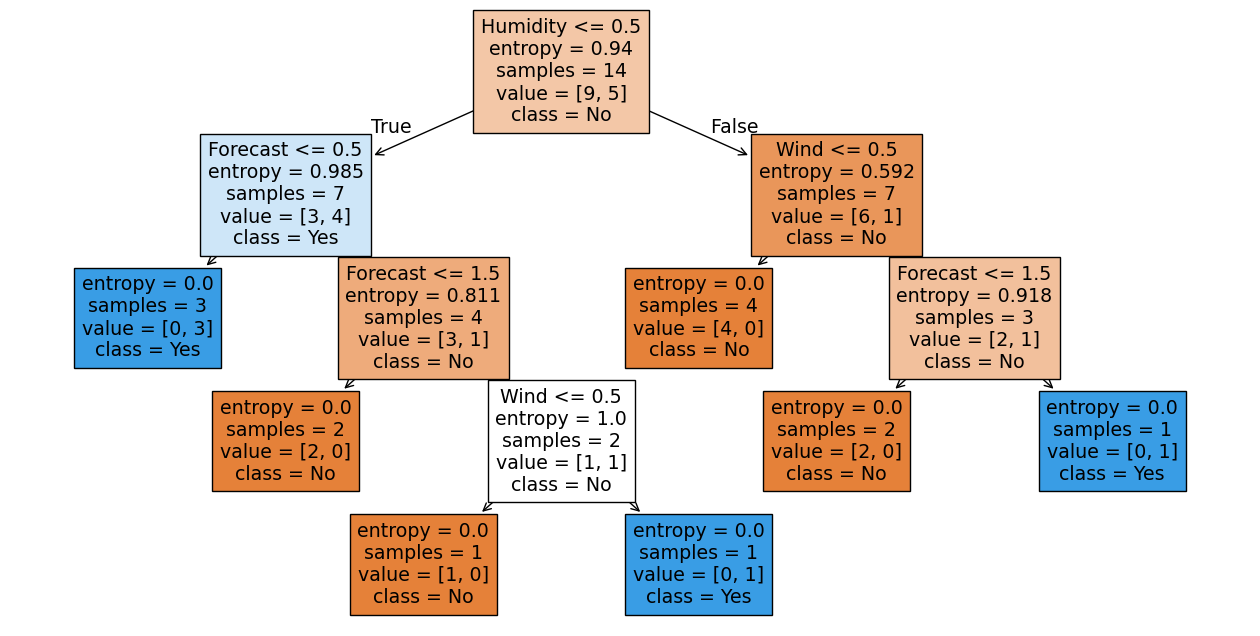

In [18]:
for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=['Forecast', 'Temperature', 'Humidity', 'Wind'], class_names=['No', 'Yes'], filled=True)
plt.show()